In [1]:
import os
import glob

import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [38]:
original_dataset = '../dataset/original_dataset/'

img_paths = glob.glob(os.path.join(original_dataset, '**/*.jpg'), recursive=True)

In [31]:
len(img_paths)

9457

In [2]:
def crop(img_path, size):
    img = cv2.imread(img_path,1)
    cropped_img = img[0:1080, 420:1980-420]
    resized_img = cv2.resize(cropped_img, dsize=(size, size))
    processed_img = cv2.cvtColor(resized_img, cv2.COLOR_BGRA2RGB)
    return processed_img

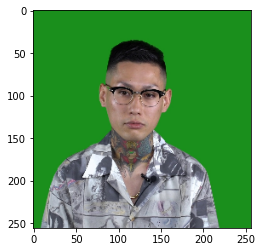

In [24]:
plt.imshow(crop(img_paths[0], 256))

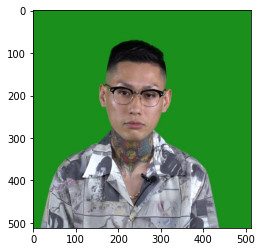

In [25]:
plt.imshow(crop(img_paths[0], 512))

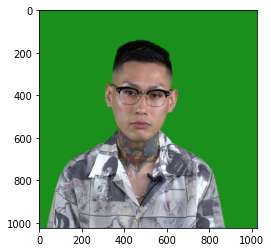

In [26]:
plt.imshow(crop(img_paths[0], 1024))

In [27]:
output_256_dir = '../dataset/processed_256/'
output_512_dir = '../dataset/processed_512/'
output_1024_dir = '../dataset/processed_1024/'

In [28]:
mkdir $output_256_dir $output_512_dir $output_1024_dir

In [41]:
for i, f in enumerate(img_paths):
    for size in [256, 512, 1024]:
        processed_img = crop(f, size)
        # 異なるディレクトリに同一名のファイルが存在するためコピー先ではファイル名をパスに対応させて一意にする。こうすることで上書きされない。
        output_path = os.path.join(f'../dataset/processed_{size}', f'{i}.jpg')
        Image.fromarray(processed_img).save(output_path, quality=100)

In [42]:
ls ../dataset/processed_256/ | wc -l

9457


In [43]:
ls ../dataset/processed_512/ | wc -l

9457


In [44]:
ls ../dataset/processed_1024/ | wc -l

9457


In [6]:
processed_img = crop('logo.png', 1024)
# 異なるディレクトリに同一名のファイルが存在するためコピー先ではファイル名をパスに対応させて一意にする。こうすることで上書きされない。
output_path = './crop_logo.png'
Image.fromarray(processed_img).save(output_path, quality=100)